#movie.csv

In [2]:
import pandas as pd

data = {
    "MovieID": [1,2,3,4,5,6,7],
    "Title": [
        "Inception","The Dark Knight","Titanic","Interstellar",
        "Joker","The Notebook","Avengers: Endgame"
    ],
    "Genre": ["Sci-Fi","Action","Romance","Sci-Fi","Drama","Romance","Action"],
    "ReleaseDate": [
        "2010-07-16","2008-07-18","1997-12-19","2014-11-07",
        "2019-10-04","2004-06-25","2019-04-26"
    ],
    "Rating": [8.8,9.0,7.8,8.6,8.4,7.9,8.4],
    "Revenue": [825532764,1004558444,2187463944,677471339,1074251311,None,2797800564],
    "Budget": [160000000,185000000,200000000,165000000,55000000,29000000,356000000]
}

df = pd.DataFrame(data)

df.to_csv("movies.csv", index=False)

print("movies.csv created successfully!")
df



movies.csv created successfully!


,MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget
0,1,Inception,Sci-Fi,2010-07-16,8.8,8.255328e+08,160000000
1,2,The Dark Knight,Action,2008-07-18,9.0,1.004558e+09,185000000
2,3,Titanic,Romance,1997-12-19,7.8,2.187464e+09,200000000
3,4,Interstellar,Sci-Fi,2014-11-07,8.6,6.774713e+08,165000000
4,5,Joker,Drama,2019-10-04,8.4,1.074251e+09,55000000
5,6,The Notebook,Romance,2004-06-25,7.9,NaN,29000000
6,7,Avengers: Endgame,Action,2019-04-26,8.4,2.797801e+09,356000000


#PART 1: Pandas Operations

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("movies.csv")
print("\nStep 1: Loaded DataFrame:")
print(df)


Step 1: Loaded DataFrame:
   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget  
0  160000000  
1  185000000  
2  200000000  
3  165000000  
4   55000000  
5   29000000  
6  356000000  


In [5]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
print("\nStep 2: ReleaseDate converted to datetime:")
print(df.dtypes)


Step 2: ReleaseDate converted to datetime:
MovieID                 int64
Title                  object
Genre                  object
ReleaseDate    datetime64[ns]
Rating                float64
Revenue               float64
Budget                  int64
dtype: object


In [6]:
df['Profit'] = df['Revenue'] - df['Budget']
print("\nStep 3: Added Profit column:")
print(df[['Title','Profit']])


Step 3: Added Profit column:
               Title        Profit
0          Inception  6.655328e+08
1    The Dark Knight  8.195584e+08
2            Titanic  1.987464e+09
3       Interstellar  5.124713e+08
4              Joker  1.019251e+09
5       The Notebook           NaN
6  Avengers: Endgame  2.441801e+09


In [7]:
def get_era(year):
    if year < 2000: return "Classic"
    elif year <= 2010: return "Mid"
    else: return "Modern"

In [8]:
df['Era'] = df['ReleaseDate'].dt.year.apply(get_era)
print("\nStep 4: Added Era column:")
print(df[['Title','ReleaseDate','Era']])


Step 4: Added Era column:
               Title ReleaseDate      Era
0          Inception  2010-07-16      Mid
1    The Dark Knight  2008-07-18      Mid
2            Titanic  1997-12-19  Classic
3       Interstellar  2014-11-07   Modern
4              Joker  2019-10-04   Modern
5       The Notebook  2004-06-25      Mid
6  Avengers: Endgame  2019-04-26   Modern


In [9]:
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].mean())
print("\nStep 5: Null Revenue filled with average:")
print(df[['Title','Revenue']])


Step 5: Null Revenue filled with average:
               Title       Revenue
0          Inception  8.255328e+08
1    The Dark Knight  1.004558e+09
2            Titanic  2.187464e+09
3       Interstellar  6.774713e+08
4              Joker  1.074251e+09
5       The Notebook  1.427846e+09
6  Avengers: Endgame  2.797801e+09


In [10]:
df_sorted = df.sort_values(by='Rating', ascending=False)
print("\nStep 6: Sorted by Rating (Descending):")
print(df_sorted[['Title','Rating']])


Step 6: Sorted by Rating (Descending):
               Title  Rating
1    The Dark Knight     9.0
0          Inception     8.8
3       Interstellar     8.6
6  Avengers: Endgame     8.4
4              Joker     8.4
5       The Notebook     7.9
2            Titanic     7.8


In [11]:
genre_summary = df.groupby('Genre').agg({'Rating':'mean','Revenue':'sum'})
print("\nStep 7: Genre Summary (Avg Rating & Total Revenue):")
print(genre_summary)


Step 7: Genre Summary (Avg Rating & Total Revenue):
         Rating       Revenue
Genre                        
Action     8.70  3.802359e+09
Drama      8.40  1.074251e+09
Romance    7.85  3.615310e+09
Sci-Fi     8.70  1.503004e+09


In [12]:
high_profit_movies = df[(df['Rating']>=8.5) & (df['Profit']>500_000_000)]
print("\nStep 8: High Profit Movies (Rating>=8.5 & Profit>500M):")
print(high_profit_movies[['Title','Rating','Profit']])


Step 8: High Profit Movies (Rating>=8.5 & Profit>500M):
             Title  Rating       Profit
0        Inception     8.8  665532764.0
1  The Dark Knight     9.0  819558444.0
3     Interstellar     8.6  512471339.0



Step 9: Plotting Movie Profit Bar Chart...


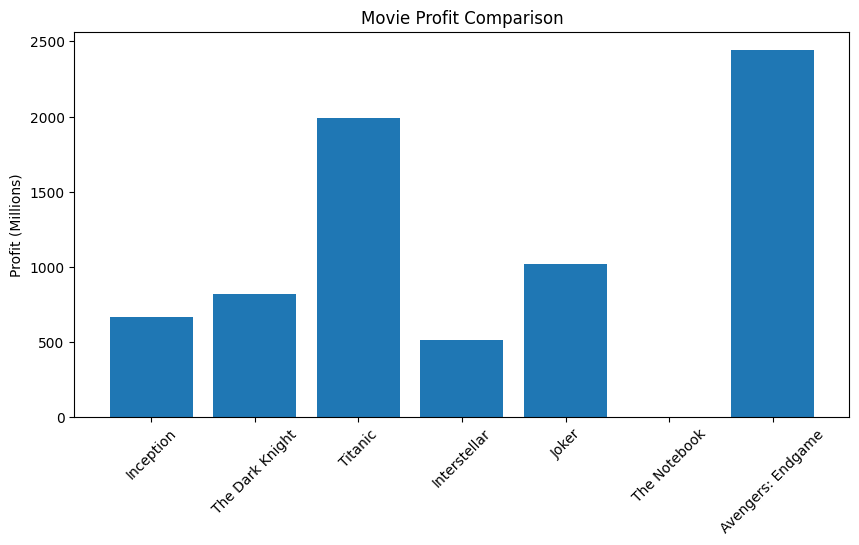

In [13]:
print("\nStep 9: Plotting Movie Profit Bar Chart...")
plt.figure(figsize=(10,5))
plt.bar(df['Title'], df['Profit']/1e6)
plt.xticks(rotation=45)
plt.ylabel("Profit (Millions)")
plt.title("Movie Profit Comparison")
plt.show()

#PART 2: PySpark Operations


In [15]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, sum as _sum, when, year, month
import pyspark.sql.functions as F
from pyspark.sql.window import Window

In [16]:
spark = SparkSession.builder.appName("MovieAnalysis").getOrCreate()

In [17]:
movies_spark = spark.read.csv("movies.csv", header=True, inferSchema=True)
print("\nStep 1: Loaded movies.csv into PySpark DataFrame")
movies_spark.show()


Step 1: Loaded movies.csv into PySpark DataFrame
+-------+-----------------+-------+-----------+------+-------------+---------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|      Revenue|   Budget|
+-------+-----------------+-------+-----------+------+-------------+---------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 8.25532764E8|160000000|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1.004558444E9|185000000|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2.187463944E9|200000000|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 6.77471339E8|165000000|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1.074251311E9| 55000000|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|         NULL| 29000000|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2.797800564E9|356000000|
+-------+-----------------+-------+-----------+------+-------------+---------+



In [18]:
movies_spark = movies_spark.withColumn("Profit", col("Revenue")-col("Budget"))
print("\nStep 2: Added Profit column")
movies_spark.show()


Step 2: Added Profit column
+-------+-----------------+-------+-----------+------+-------------+---------+-------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|      Revenue|   Budget|       Profit|
+-------+-----------------+-------+-----------+------+-------------+---------+-------------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 8.25532764E8|160000000| 6.65532764E8|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1.004558444E9|185000000| 8.19558444E8|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2.187463944E9|200000000|1.987463944E9|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 6.77471339E8|165000000| 5.12471339E8|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1.074251311E9| 55000000|1.019251311E9|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|         NULL| 29000000|         NULL|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2.797800564E9|356000000|2.441800564E9|
+-------+-----------------+-------+------

In [19]:
print("\nStep 3: Sci-Fi Movies with Profit > 500M")
sci_fi_hits = movies_spark.filter((col("Genre")=="Sci-Fi") & (col("Profit")>500_000_000))
sci_fi_hits.show()



Step 3: Sci-Fi Movies with Profit > 500M
+-------+------------+------+-----------+------+------------+---------+------------+
|MovieID|       Title| Genre|ReleaseDate|Rating|     Revenue|   Budget|      Profit|
+-------+------------+------+-----------+------+------------+---------+------------+
|      1|   Inception|Sci-Fi| 2010-07-16|   8.8|8.25532764E8|160000000|6.65532764E8|
|      4|Interstellar|Sci-Fi| 2014-11-07|   8.6|6.77471339E8|165000000|5.12471339E8|
+-------+------------+------+-----------+------+------------+---------+------------+



In [20]:
print("\nStep 4: Genre-wise Avg Rating & Total Profit")
genre_stats = movies_spark.groupBy("Genre").agg(
    avg("Rating").alias("AvgRating"),
    _sum("Profit").alias("TotalProfit")
)
genre_stats.show()


Step 4: Genre-wise Avg Rating & Total Profit
+-------+---------+-------------+
|  Genre|AvgRating|  TotalProfit|
+-------+---------+-------------+
|Romance|     7.85|1.987463944E9|
|  Drama|      8.4|1.019251311E9|
| Action|      8.7|3.261359008E9|
| Sci-Fi|      8.7|1.178004103E9|
+-------+---------+-------------+



In [21]:
print("\nStep 5: Classified Movies by Category")
movies_spark = movies_spark.withColumn("Category",
    when(col("Rating")==9,"Blockbuster")
    .when((col("Rating")>=8),"Hit")
    .otherwise("Average")
)
movies_spark.show()




Step 5: Classified Movies by Category
+-------+-----------------+-------+-----------+------+-------------+---------+-------------+-----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|      Revenue|   Budget|       Profit|   Category|
+-------+-----------------+-------+-----------+------+-------------+---------+-------------+-----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 8.25532764E8|160000000| 6.65532764E8|        Hit|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1.004558444E9|185000000| 8.19558444E8|Blockbuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2.187463944E9|200000000|1.987463944E9|    Average|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 6.77471339E8|165000000| 5.12471339E8|        Hit|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1.074251311E9| 55000000|1.019251311E9|        Hit|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|         NULL| 29000000|         NULL|    Average|
|      7|Avenger

In [22]:

movies_spark = movies_spark.drop("Budget")
print("\nStep 6: Dropped Budget column")
movies_spark.show()


Step 6: Dropped Budget column
+-------+-----------------+-------+-----------+------+-------------+-------------+-----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|      Revenue|       Profit|   Category|
+-------+-----------------+-------+-----------+------+-------------+-------------+-----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 8.25532764E8| 6.65532764E8|        Hit|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1.004558444E9| 8.19558444E8|Blockbuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2.187463944E9|1.987463944E9|    Average|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 6.77471339E8| 5.12471339E8|        Hit|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1.074251311E9|1.019251311E9|        Hit|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|         NULL|         NULL|    Average|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2.797800564E9|2.441800564E9|        Hit|
+-------+----------

In [23]:

avg_rev = movies_spark.select(F.mean(col("Revenue"))).collect()[0][0]
movies_spark = movies_spark.fillna({"Revenue": avg_rev})
print("\nStep 7: Filled Null Revenue with Average")
movies_spark.show()




Step 7: Filled Null Revenue with Average
+-------+-----------------+-------+-----------+------+--------------------+-------------+-----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|             Revenue|       Profit|   Category|
+-------+-----------------+-------+-----------+------+--------------------+-------------+-----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8|        8.25532764E8| 6.65532764E8|        Hit|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|       1.004558444E9| 8.19558444E8|Blockbuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|       2.187463944E9|1.987463944E9|    Average|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6|        6.77471339E8| 5.12471339E8|        Hit|
|      5|            Joker|  Drama| 2019-10-04|   8.4|       1.074251311E9|1.019251311E9|        Hit|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1.4278463943333333E9|         NULL|    Average|
|      7|Avengers: Endgame| Action| 2019

In [24]:
movies_spark = movies_spark.withColumn("Year", year(col("ReleaseDate")))
movies_spark = movies_spark.withColumn("Month", month(col("ReleaseDate")))
print("\nStep 8: Extracted Year and Month")
movies_spark.show()


Step 8: Extracted Year and Month
+-------+-----------------+-------+-----------+------+--------------------+-------------+-----------+----+-----+
|MovieID|            Title|  Genre|ReleaseDate|Rating|             Revenue|       Profit|   Category|Year|Month|
+-------+-----------------+-------+-----------+------+--------------------+-------------+-----------+----+-----+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8|        8.25532764E8| 6.65532764E8|        Hit|2010|    7|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|       1.004558444E9| 8.19558444E8|Blockbuster|2008|    7|
|      3|          Titanic|Romance| 1997-12-19|   7.8|       2.187463944E9|1.987463944E9|    Average|1997|   12|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6|        6.77471339E8| 5.12471339E8|        Hit|2014|   11|
|      5|            Joker|  Drama| 2019-10-04|   8.4|       1.074251311E9|1.019251311E9|        Hit|2019|   10|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1.427846

In [25]:
print("\nStep 9: Ranking Movies by Profit within each Genre")
window_spec = Window.partitionBy("Genre").orderBy(col("Profit").desc())
ranked_movies = movies_spark.withColumn("Rank", F.rank().over(window_spec))
ranked_movies.show()


Step 9: Ranking Movies by Profit within each Genre
+-------+-----------------+-------+-----------+------+--------------------+-------------+-----------+----+-----+----+
|MovieID|            Title|  Genre|ReleaseDate|Rating|             Revenue|       Profit|   Category|Year|Month|Rank|
+-------+-----------------+-------+-----------+------+--------------------+-------------+-----------+----+-----+----+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|       2.797800564E9|2.441800564E9|        Hit|2019|    4|   1|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|       1.004558444E9| 8.19558444E8|Blockbuster|2008|    7|   2|
|      5|            Joker|  Drama| 2019-10-04|   8.4|       1.074251311E9|1.019251311E9|        Hit|2019|   10|   1|
|      3|          Titanic|Romance| 1997-12-19|   7.8|       2.187463944E9|1.987463944E9|    Average|1997|   12|   1|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1.4278463943333333E9|         NULL|    Average|2004|    6|   2|
|   

#PART 3: JSON + Union + Bonus

In [26]:
bonus_data = [
    {"MovieID": 8, "Title": "Barbie", "Genre": "Drama", "Rating": 7.5, "Revenue":1456000000, "Budget":145000000},
    {"MovieID": 9, "Title": "Oppenheimer", "Genre": "Drama", "Rating": 8.6, "Revenue":950000000, "Budget":100000000}
]
bonus_df = pd.DataFrame(bonus_data)
bonus_df.to_json("movies_bonus.json", orient="records", lines=False)
print("\nStep 0: Created movies_bonus.json")
print(bonus_df)



Step 0: Created movies_bonus.json
   MovieID        Title  Genre  Rating     Revenue     Budget
0        8       Barbie  Drama     7.5  1456000000  145000000
1        9  Oppenheimer  Drama     8.6   950000000  100000000


In [27]:
bonus_spark = spark.read.json("movies_bonus.json")
print("\nStep 1: Read JSON Data")
bonus_spark.show()




Step 1: Read JSON Data
+---------+-----+-------+------+----------+-----------+
|   Budget|Genre|MovieID|Rating|   Revenue|      Title|
+---------+-----+-------+------+----------+-----------+
|145000000|Drama|      8|   7.5|1456000000|     Barbie|
|100000000|Drama|      9|   8.6| 950000000|Oppenheimer|
+---------+-----+-------+------+----------+-----------+



In [28]:

final_df = movies_spark.unionByName(bonus_spark, allowMissingColumns=True)
print("\nStep 2: Union with original movies DataFrame")
final_df.show()


Step 2: Union with original movies DataFrame
+-------+-----------------+-------+-----------+------+--------------------+-------------+-----------+----+-----+---------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|             Revenue|       Profit|   Category|Year|Month|   Budget|
+-------+-----------------+-------+-----------+------+--------------------+-------------+-----------+----+-----+---------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8|        8.25532764E8| 6.65532764E8|        Hit|2010|    7|     NULL|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|       1.004558444E9| 8.19558444E8|Blockbuster|2008|    7|     NULL|
|      3|          Titanic|Romance| 1997-12-19|   7.8|       2.187463944E9|1.987463944E9|    Average|1997|   12|     NULL|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6|        6.77471339E8| 5.12471339E8|        Hit|2014|   11|     NULL|
|      5|            Joker|  Drama| 2019-10-04|   8.4|       1.074251311E9|1.019251311E9|    

In [29]:
print("\nStep 3: Top 5 Highest Grossing Movies")
final_df.orderBy(col("Revenue").desc()).show(5)




Step 3: Top 5 Highest Grossing Movies
+-------+-----------------+-------+-----------+------+--------------------+-------------+--------+----+-----+---------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|             Revenue|       Profit|Category|Year|Month|   Budget|
+-------+-----------------+-------+-----------+------+--------------------+-------------+--------+----+-----+---------+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|       2.797800564E9|2.441800564E9|     Hit|2019|    4|     NULL|
|      3|          Titanic|Romance| 1997-12-19|   7.8|       2.187463944E9|1.987463944E9| Average|1997|   12|     NULL|
|      8|           Barbie|  Drama|       NULL|   7.5|             1.456E9|         NULL|    NULL|NULL| NULL|145000000|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1.4278463943333333E9|         NULL| Average|2004|    6|     NULL|
|      5|            Joker|  Drama| 2019-10-04|   8.4|       1.074251311E9|1.019251311E9|     Hit|2019|   10|     NULL|
+

In [30]:
final_df.write.csv("final_movies.csv", header=True, mode="overwrite")
print("\nStep 4: Saved final merged DataFrame as final_movies.csv")


Step 4: Saved final merged DataFrame as final_movies.csv


In [36]:
final_df = final_df.withColumn("Profit", col("Revenue")-col("Budget"))
final_df = final_df.withColumn("ROI", col("Profit")/col("Budget"))
print("\nStep 5: Added Profit and ROI columns")
final_df.show()




Step 5: Added Profit and ROI columns
+-------+-----------------+-------+-----------+------+--------------------+-------+-----------+----+-----+---------+-----------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|             Revenue| Profit|   Category|Year|Month|   Budget|              ROI|
+-------+-----------------+-------+-----------+------+--------------------+-------+-----------+----+-----+---------+-----------------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8|        8.25532764E8|   NULL|        Hit|2010|    7|     NULL|             NULL|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|       1.004558444E9|   NULL|Blockbuster|2008|    7|     NULL|             NULL|
|      3|          Titanic|Romance| 1997-12-19|   7.8|       2.187463944E9|   NULL|    Average|1997|   12|     NULL|             NULL|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6|        6.77471339E8|   NULL|        Hit|2014|   11|     NULL|             NULL|
|      5|        

In [34]:

print("\nBonus: Top ROI Movies (Budget > 50M)")
top_roi = final_df.filter(col("Budget")>=50_000_000).orderBy(col("ROI").desc())
top_roi.show()



Bonus: Top ROI Movies (Budget > 50M)
+-------+-----------+-----+-----------+------+-------+-------+--------+----+-----+---------+-----------------+
|MovieID|      Title|Genre|ReleaseDate|Rating|Revenue| Profit|Category|Year|Month|   Budget|              ROI|
+-------+-----------+-----+-----------+------+-------+-------+--------+----+-----+---------+-----------------+
|      8|     Barbie|Drama|       NULL|   7.5|1.456E9|1.311E9|    NULL|NULL| NULL|145000000|9.041379310344828|
|      9|Oppenheimer|Drama|       NULL|   8.6|  9.5E8|  8.5E8|    NULL|NULL| NULL|100000000|              8.5|
+-------+-----------+-----+-----------+------+-------+-------+--------+----+-----+---------+-----------------+




Bonus: Plotting Genre-wise ROI


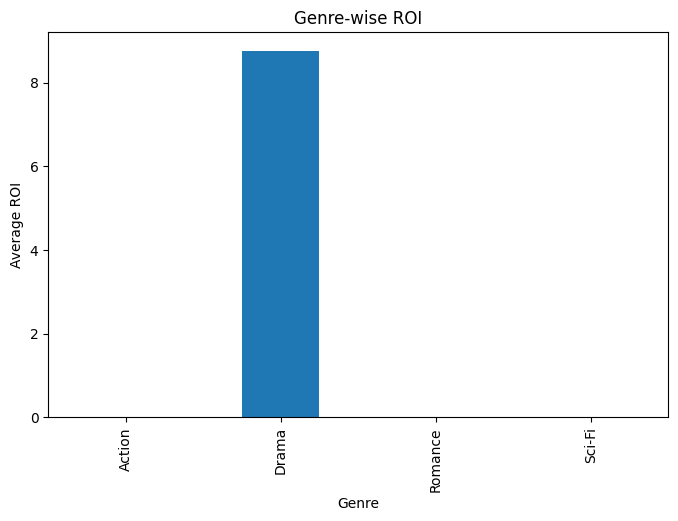

In [35]:
print("\nBonus: Plotting Genre-wise ROI")
final_pdf = final_df.toPandas()
genre_roi = final_pdf.groupby("Genre")["ROI"].mean()
genre_roi.plot(kind="bar", title="Genre-wise ROI", figsize=(8,5))
plt.ylabel("Average ROI")
plt.show()